# Popis
* V modelu jsme zvolili emisivitu a teplotu konců drátu tak, aby teplota při 4.5 A byla 2250 K.
* Potom nás zajímá závislost T(I) v rozsahu 1 - 6 A
*

In [9]:
import numpy as np
import glob
import yaml
import os
import vtk
import pandas as pd
import matplotlib.pyplot as plt

# Plotting max temperature for different port temperatures

In [10]:
# This will not run unless you have the data, go to 

files = glob.glob('./parametric_study/with_thermoemission_eps0p3__parametric_study__[0-9]*.yml')

results = {}

for f in files:
    d = f.replace('.yml', '')
    cfg = yaml.load(open(f))
    Tport = cfg['overlord']['matc_variables']['Tport']
    current = cfg['overlord']['matc_variables']['current']
    lastvtu = glob.glob(os.path.join(d, 'emissive_probe_mesh_hollow2/*.pvtu'))[-1]

    reader = vtk.vtkXMLPUnstructuredGridReader()
    reader.SetFileName(lastvtu)
    reader.Update()

    output = reader.GetOutput()
    temperature = np.array(output.GetPointData().GetArray('temperature'))
    potential = np.array(output.GetPointData().GetArray('potential'))
    maxtemp = np.max(temperature)
    voltage = np.max(np.abs(potential))
    number = int(d.split('__')[-1])

    results[number] = {'Tport': Tport, 'current': current, 'Tmax': maxtemp, 'voltage': voltage}
    
df = pd.DataFrame.from_dict(results, orient='index')
df.to_csv('study01_Tport.csv', index=False)

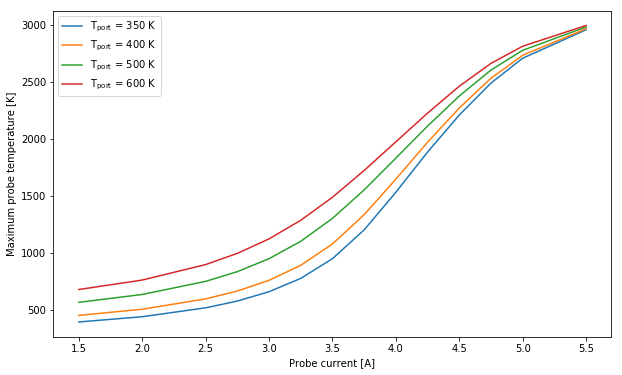

In [11]:
df = pd.read_csv('study01_Tport.csv')

plt.figure(figsize=(10,6))
for Tport in [350, 400, 500, 600]:
    limited = df.where(df['Tport'] == Tport).dropna()
    plt.plot(limited['current'], limited['Tmax'], label=r'T$_{{\rm port}}$ = {} K'.format(Tport))
plt.legend()
plt.xlabel('Probe current [A]')
plt.ylabel('Maximum probe temperature [K]')
plt.savefig('temperature_vs_probe_current_parametric.png')
plt.show()

#plt.plot(dfdata.index, dfdata['T_350'])

# Plotting for various emissivities

In [39]:
# This will not run unless you have the data, go to 

files = glob.glob('./parametric_study_emissivity/with_thermoemission__variable_emissivity__[0-9]*.yml')

results = {}

for f in files:
    d = f.replace('.yml', '')
    cfg = yaml.load(open(f))
    Tport = cfg['overlord']['matc_variables']['Tport']
    current = cfg['overlord']['matc_variables']['current']
    emissivity = cfg['overlord']['matc_variables']['emissivity']
    lastvtu = glob.glob(os.path.join(d, 'emissive_probe_mesh_hollow2/*.pvtu'))[-1]

    reader = vtk.vtkXMLPUnstructuredGridReader()
    reader.SetFileName(lastvtu)
    reader.Update()

    output = reader.GetOutput()
    temperature = np.array(output.GetPointData().GetArray('temperature'))
    potential = np.array(output.GetPointData().GetArray('potential'))
    maxtemp = np.max(temperature)
    voltage = np.max(np.abs(potential))
    number = int(d.split('__')[-1])

    results[number] = {'Tport': Tport, 'current': current, 'emissivity': emissivity, 'Tmax': maxtemp, 'voltage': voltage, 'fileid': d.split('__')[-1]}
    
df = pd.DataFrame.from_dict(results, orient='index')
# Manualne pridame jeden zaznam, simulace delana "bokem"
df = df.append(pd.DataFrame([[400, 5.5, 0.2, 3046.0, 1.568, 40]], columns=['Tport', 'current', 'emissivity', 'Tmax', 'voltage', 'fileid']))
df.to_csv('study02_emissivity.csv', index=False)

In [40]:
df

Tport  current  emissivity         Tmax   voltage fileid
0     400     1.50         0.1   454.994701  0.071824      0
1     400     1.50         0.2   454.559642  0.071768      1
2     400     1.50         0.3   454.149633  0.071716      2
3     400     2.00         0.1   509.708336  0.105309      3
4     400     2.00         0.2   508.930477  0.105176      4
5     400     2.00         0.3   508.188062  0.105049      5
6     400     2.50         0.1   602.559857  0.151735      6
7     400     2.50         0.2   600.820983  0.151370      7
8     400     2.50         0.3   599.133655  0.151013      8
9     400     2.75         0.1   673.714034  0.183762      9
10    400     2.75         0.2   670.747424  0.183076     10
11    400     2.75         0.3   667.924777  0.182424     11
12    400     3.00         0.1   772.787099  0.225968     12
13    400     3.00         0.2   767.214357  0.224569     13
14    400     3.00         0.3   761.891691  0.223233     14
15    400     3.25         0.1   916.871645  0.284843     15
16    400     3.25         0.2   904.732138  0.281548     16
17    400     3.25         0.3   893.685454  0.278546     17
18    400     3.50         0.1  1137.859931  0.372716     18
19    400     3.50         0.2  1106.762596  0.363633     19
20    400     3.50         0.3  1080.803240  0.356045     20
21    400     3.75         0.1  1487.940527  0.511222     21
22    400     3.75         0.2  1400.010056  0.483651     22
23    400     3.75         0.3  1337.818024  0.464134     23
24    400     4.00         0.1  1997.279927  0.719571     24
25    400     4.00         0.2  1778.031729  0.645946     25
26    400     4.00         0.3  1650.377703  0.603019     26
27    400     4.25         0.1  2543.364196  0.966040     27
28    400     4.25         0.2  2177.522956  0.834177     28
29    400     4.25         0.3  1973.396191  0.760796     29
30    400     4.50         0.1  2838.917548  1.148395     30
31    400     4.50         0.2  2531.740408  1.025413     31
32    400     4.50         0.3  2274.219609  0.926232     32
33    400     4.75         0.1  2944.613017  1.272711     33
34    400     4.75         0.2  2775.769742  1.192849     34
35    400     4.75         0.3  2535.195752  1.091415     35
36    400     5.00         0.1  3049.721913  1.406547     36
37    400     5.00         0.2  2917.946089  1.333512     37
38    400     5.00         0.3  2736.666320  1.246775     38
39    400     5.50         0.1  3124.776413  1.593527     39
41    400     5.50         0.3  2969.603075  1.518767     41
0     400     5.50         0.2  3046.000000  1.568000     40

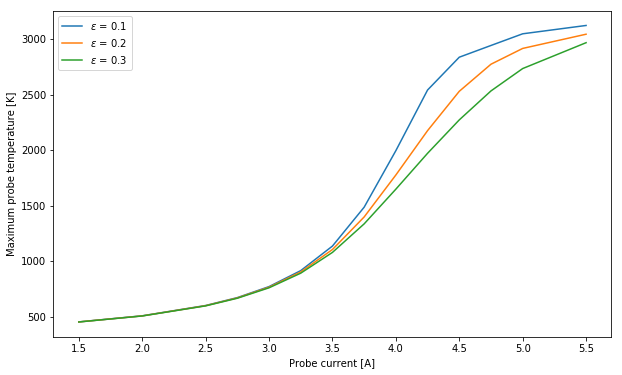

In [41]:
df = pd.read_csv('study02_emissivity.csv')

plt.figure(figsize=(10,6))
for emissivity in [0.1, 0.2, 0.3]:
    limited = df.where(df['emissivity'] == emissivity).dropna()
    plt.plot(limited['current'], limited['Tmax'], label=r'$\epsilon$ = {}'.format(emissivity))
plt.legend()
plt.xlabel('Probe current [A]')
plt.ylabel('Maximum probe temperature [K]')
plt.savefig('temperature_vs_emissivity_parametric.png')
plt.show()